In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
x1 = np.random.randn(200)
x2 = np.random.randn(200)
x3 = np.random.randn(200)
x4 = np.random.randn(200)
y = np.zeros_like(x1)

for i in range(0, len(x1)):
    y[i] = 3*x1[i] + 2*x2[i] + 4*x3[i] + 7*x4[i]


In [4]:
# Normalizar o dado

x1n = (x1 - np.mean(x1))/np.std(x1)
x2n = (x2 - np.mean(x2))/np.std(x2)
x3n = (x3 - np.mean(x3))/np.std(x3)
x4n = (x4 - np.mean(x4))/np.std(x4)
yn = (y - np.mean(y))/np.std(y)

In [5]:
data = [x1n, x2n, x3n, x4n, yn]
data = np.transpose(data)

In [6]:
train_input = data[:150, :4]
train_target = data[:150, [4]]

In [7]:
test_input = data[150:, :4]
test_target = data[150:, [4]]

In [8]:
torch.manual_seed(1234)

In [9]:
# N = 1 # Batch size
D_in = 4 # Input dimension
D_out = 1 # Output dimension 
hidden_units = 3

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 12)
        self.fc2 = nn.Linear(12, 6)
        self.fc3 = nn.Linear(6, 2)
        self.fc4 = nn.Linear(2, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return(x)

net = Net()

In [11]:
# Choose optmizer and loss function
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.05, momentum = 0.9) # lr = learning rate 

In [12]:
# Train
epochs = 1000
lossr = np.zeros(epochs)

for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(train_input).float())
    targets = torch.autograd.Variable(torch.Tensor(train_target).float())
    
    optimizer.zero_grad()
    out = net(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    lossr[epoch] = loss.item()
    
    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))

Epoch 1 Loss: 1.0984
Epoch 10 Loss: 0.8355
Epoch 20 Loss: 0.2609
Epoch 30 Loss: 0.1912
Epoch 40 Loss: 0.0979
Epoch 50 Loss: 0.0499
Epoch 60 Loss: 0.0335
Epoch 70 Loss: 0.0198
Epoch 80 Loss: 0.0141
Epoch 90 Loss: 0.0099
Epoch 100 Loss: 0.0071
Epoch 110 Loss: 0.0054
Epoch 120 Loss: 0.0046
Epoch 130 Loss: 0.0040
Epoch 140 Loss: 0.0035
Epoch 150 Loss: 0.0031
Epoch 160 Loss: 0.0028
Epoch 170 Loss: 0.0026
Epoch 180 Loss: 0.0024
Epoch 190 Loss: 0.0022
Epoch 200 Loss: 0.0020
Epoch 210 Loss: 0.0019
Epoch 220 Loss: 0.0018
Epoch 230 Loss: 0.0017
Epoch 240 Loss: 0.0016
Epoch 250 Loss: 0.0015
Epoch 260 Loss: 0.0015
Epoch 270 Loss: 0.0014
Epoch 280 Loss: 0.0013
Epoch 290 Loss: 0.0013
Epoch 300 Loss: 0.0012
Epoch 310 Loss: 0.0012
Epoch 320 Loss: 0.0012
Epoch 330 Loss: 0.0011
Epoch 340 Loss: 0.0011
Epoch 350 Loss: 0.0011
Epoch 360 Loss: 0.0010
Epoch 370 Loss: 0.0010
Epoch 380 Loss: 0.0010
Epoch 390 Loss: 0.0010
Epoch 400 Loss: 0.0009
Epoch 410 Loss: 0.0009
Epoch 420 Loss: 0.0009
Epoch 430 Loss: 0.0009

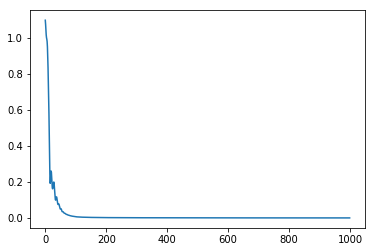

In [13]:
epoch = np.arange(0, epochs)
plt.plot(epoch,lossr)
plt.show()

In [14]:
# Avaliando a acurácia do modelo
inputs = torch.autograd.Variable(torch.Tensor(test_input).float())
targets = torch.autograd.Variable(torch.Tensor(test_target).float())

optimizer.zero_grad()
out = net(inputs)
loss = criterion(out, targets)
loss.backward()
optimizer.step()

predicted = out.data

print('Teste Loss: %.4f' % (loss.item()))

Teste Loss: 0.0028


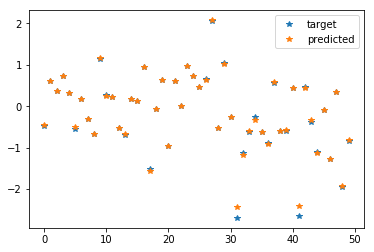

In [15]:
ninput = np.arange(len(test_input))
plt.figure()
plt.plot(ninput, test_target, '*', label = 'target')
plt.plot(ninput, predicted.numpy(), '*', label = 'predicted')
plt.legend()
plt.show()

In [16]:
predicted = (predicted.numpy()*np.std(y)) + np.mean(y)
target = (test_target*np.std(y)) + np.mean(y)

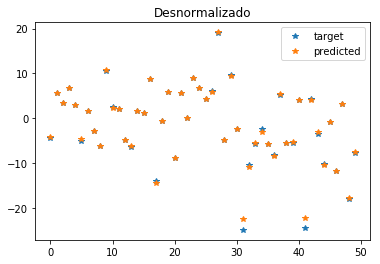

In [17]:
plt.figure()
plt.plot(ninput, target, '*', label = 'target')
plt.plot(ninput, predicted, '*', label = 'predicted')
plt.title('Desnormalizado')
plt.legend()
plt.show()